Загрузим необходимые библиотеки, и откроем файлы данных Excel для дальнейшего анализа.

In [1]:
import pandas as pd
df=pd.read_excel('/content/Премиум авто.xlsx')
df.head()

,Client ID,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,Medium,...,Конверсия,Source conv.,Domain.2,Domain.3,Domain.1.1,Domain.1.2,Марка,Модель,Стоимость,Продажа
0,GA1.2.1034804123.1579633446,Krasnodar,Krasnodar Krai,YaBrowser,desktop,8 февраля 2020 г.,20,(not set),(not set),referral,...,0,yandex.ru,keyauto,krd.ru,BMW,NaN,BMW,NaN,NaN,1.0
1,GA1.2.1034804123.1579633446,Krasnodar,Krasnodar Krai,YaBrowser,desktop,8 февраля 2020 г.,20,(not set),(not set),referral,...,0,BMW-keyauto-krd.ru,keyauto,krd.ru,BMW,NaN,BMW,NaN,NaN,1.0
2,GA1.2.1034804123.1579633446,Krasnodar,Krasnodar Krai,YaBrowser,desktop,8 февраля 2020 г.,2,(not set),(not set),referral,...,0,BMW-keyauto-krd.ru,keyauto,krd.ru,cars,BMW,BMW,NaN,NaN,1.0
3,GA1.2.1910887781.1581712638,Vidnoye,Moscow Oblast,Chrome,mobile,14 февраля 2020 г.,26,(not set),(not set),(none),...,0,(direct),krasnodar.ru,NaN,Mersedes,NaN,Mersedes,NaN,NaN,1.0
4,GA1.2.147838086.1579854819,Moscow,Moscow,Chrome,desktop,24 января 2020 г.,2,36451521,киа соренто прайм комплектации и цены фото,cpc,...,1,YANDEX,krasnodar.ru,NaN,Mersedes,NaN,Mersedes,glc,3950000.0,1.0


**Вопрос 01. Из каких регионов больше всего заявок?**<br>
Для определения данного параметра рассмотрим количество приходов к дилеру из таблицы с данными из CRM.

In [2]:
df_pivot = df.pivot_table(index='Region', values='Конверсия', aggfunc='sum')
df_pivot.sort_values('Конверсия', ascending=False)

,Конверсия
Region,
Krasnodar Krai,23849
Stavropol Krai,1642
Rostov Oblast,1160
Moscow,1036
Crimea,667
...,...
Tokyo,0
Lodz Voivodeship,0
Bangui,0


Следовательно, большинство заявок было из Краснодарского края, Ставропольского края и Ростовской области.

**Вопрос 02. Какой средний процент отказов (Bounce)?**<br>
Для этого будем использовать значения из столбца "Bounce Rate" в таблице "Марткетинговые данные".

In [3]:
print('Средний процент отказа', round(df['Bounce Rate'].mean()*100, 2),'%')

Средний процент отказа 0.23 %


**Вопрос 03. С каких устройств чаще заходят на сайты?**<br>
Воспользуемся значениями из столбца "Device Category" в таблице "Маркетинговые данные".

In [6]:
devices=df['Device Category'].value_counts()
devices

mobile     39465
desktop    24630
tablet      2067
Name: Device Category, dtype: int64

Следовательно чаще всего на сайты заходят с мобильных телефонов.

**Вопрос 04. Какие источники наиболее конвертируемые?**<br>

In [5]:
df_source = df.pivot_table(index='Source', values='Конверсия', aggfunc='sum')
df_source.sort_values('Конверсия', ascending=False)

,Конверсия
Source,
google,9106
yandex.ru,5668
yandex,5035
(direct),4790
BMW-keyauto-krd.ru,4151
...,...
stavropol.drom.ru,0
rnd.autoneva.ru,0
msk.autoneva.ru,0


Таким образом самыми конвертируемыми источниками являются Google и Яндекс.

**Вопрос 05. Посчитайте выручку в рублях только по долларовым позициям.**<br>
Для этого загрузим значения из справочных данных, а затем воспользуемся таблицей с маркетинговыми данными.

In [12]:
handbook=pd.read_excel('/content/Справочник.xlsx')
handbook.head()

,Марка,Модель,Цена,Валюта,Маржинальность,Курс,Цена в рублях,Маржа в рублях
0,Mercedes,с180,2300000.0,Рубль,0.20,1.0,2300000.0,460000.0
1,Mercedes,e220,3850000.0,Рубль,0.21,1.0,3850000.0,808500.0
2,BMW,x1,2200000.0,Рубль,0.22,1.0,2200000.0,484000.0
3,BMW,x3,3350000.0,Рубль,0.23,1.0,3350000.0,770500.0
4,Mercedes,c200,2750000.0,Рубль,0.24,1.0,2750000.0,660000.0


Выберем модели, которые имеют цену в доллрарах.

In [13]:
dollar_models=handbook[handbook['Валюта']=='$']
dollar_models

,Марка,Модель,Цена,Валюта,Маржинальность,Курс,Цена в рублях,Маржа в рублях
13,Mercedes,gls,113513.513514,$,0.33,94.8076,1.076194e+07,3.551441e+06
14,Mercedes,GT_AMG,174324.324324,$,0.34,94.8076,1.652727e+07,5.619272e+06


In [14]:
# количество проданных авто
sales = df[(df['Марка']=='Mersedes') & ((df['Модель']=='gls') | (df['Модель']=='GT_AMG')) & df['Продажа']>0]
sales

,Client ID,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,Medium,...,Конверсия,Source conv.,Domain.2,Domain.3,Domain.1.1,Domain.1.2,Марка,Модель,Стоимость,Продажа
9,GA1.2.1536866849.1574754009,Moscow,Moscow,Chrome,desktop,11 февраля 2020 г.,2,(not set),(not set),(none),...,1,(direct),krasnodar.ru,NaN,Mersedes,NaN,Mersedes,GT_AMG,174324.324324,1.0


Получаем, что была продана только одна модель Mersedes GT_AMG, цена которой 174 324 долларов. При текущем курсе 1$ = 94.8076 рубля выручка будет составлять:

In [29]:
profit_in_rub=sales['Стоимость']*94.8076
profit_in_rub

9    1.652727e+07
Name: Стоимость, dtype: float64

т.е. 16 527 270 рублей.

**Вопрос 06. Определите, какой источник трафика наиболее выгоден для компании по текущим данным.**

Ответ см. в файле Power BI.

**Вопрос 07. Рассчитайте ROMI (при расчете придумайте методологию расчета средней стоимость проданного автомобиля).**

In [16]:
# Рассчитаем среднюю стоимость сначала для автомобилей, цена которых в рублях.
mean_price_rub=round((handbook['Цена в рублях'].mean()),0)
mean_price_rub

5359599.0

In [22]:
# Вычислим количество продаж из таблицы CRM
df_CRM=pd.read_excel('/content/Данные из CRM.xlsx')
df_sales=df_CRM['Продажа'].sum()
df_sales


4086.0

In [18]:
# Вычислим расходы на рекламу
adv_cost=df['Goal Value'].sum()
adv_cost

875703493

In [30]:
# Рассчитаем ROMI
ROMI=round(((df_sales*mean_price_rub)/adv_cost),0)
print('Показатель ROMI', ROMI)

Показатель ROMI 25.0


Показатель ROMI получислся больше 0, следовательно инвестиции в рекламу окупаются.<br>


**Вопрос 08. Сделать прогноз до конца февраля по количеству конверсий на каждый день.**

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
prediction=pd.read_excel('/content/Маркетинговые данные с конверсией.xlsx')

In [36]:
conversion=prediction.groupby('Date').agg({'Конверсия':['sum']})
conversion.head()

,Конверсия
,sum
Date,
2020-01-01,445
2020-01-02,609
2020-01-03,678
2020-01-04,672
2020-01-05,642


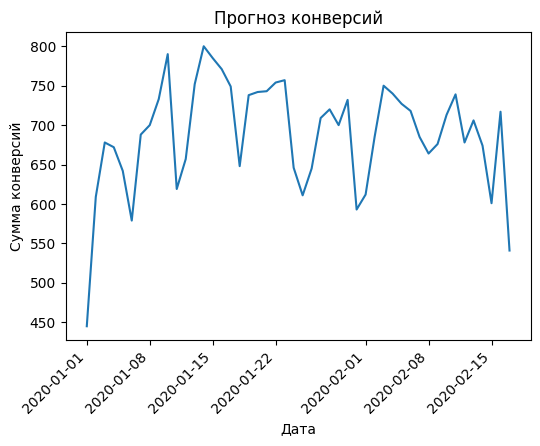

In [37]:
plt.figure(figsize=(6,4))
plt.plot(conversion)

plt.title('Прогноз конверсий')
plt.ylabel('Сумма конверсий')
plt.xlabel('Дата')
plt.xticks(rotation=45, ha='right');

Анализируя полученный график, можно увидеть, что пик конверсий приходится на середину месяца, как в январе, так и в феврале. Следовательно, учитывая текущую тенденцию, количество конверсий на конец февраля уменьшится.

**Вопрос 09. Какая будет выручка за первый квартал, если средняя стоимость авто останется неизменной, а продажи будут пропорциональны текущим данным?**

Имеются данные за 1,5 месяца. Ранее в вопросе 07 были вычислены количество продаж, а также средняя цена автомобиля. Поскольку в квартале 3 месяца, и доход за 1,5 месяца известен, то при сохранении текущей тенденции продаж выручка за 1-й кваратал будет:

In [31]:
profit_quarter=df_sales*mean_price_rub * 2
print ('Ожидаемая выручка за 1-й кваратал', profit_quarter, 'руб.')

Ожидаемая выручка за 1-й кваратал 43798643028.0 руб.


**Вопрос 10. Каких показателей не хватает, чтобы посчитать чистую прибыль?**

Ответ: Не хватает конкретной стоимости проданных автомобилей, размера издержек на аренду торговых площадей, фонда оплаты труда и т.п.